In [1]:
#importing the necessary libraries
import tensorflow as tf
import gc
from tensorflow import keras
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from datetime import datetime 
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
import imblearn
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [3]:
#loading the dataset
file = tf.keras.utils
df = pd.read_csv('https://storage.googleapis.com/download.tensorflow.org/data/creditcard.csv')

In [4]:
#checking the dataset
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
#Checking the datasets which are fraud
df[df["Class"] == 1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [6]:
#shows the 5 rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
#describes the column
df.describe

<bound method NDFrame.describe of             Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
...          ...        ...        ...       ...       ...       ...   
284802  172786.0 -11.881118  10.071785 -9.834783 -2.066656 -5.364473   
284803  172787.0  -0.732789  -0.055080  2.035030 -0.738589  0.868229   
284804  172788.0   1.919565  -0.301254 -3.249640 -0.557828  2.630515   
284805  172788.0  -0.240440   0.530483  0.702510  0.689799 -0.377961   
284806  172792.0  -0.533413  -0.189733  0.703337 -0.506271 -0.012546   

              V6        V7        V8        V9  ...       V21       V22  \
0       0.462388  0.239599

In [8]:
#showing the balance of the datasets as a fraction
neg, pos = np.bincount(df['Class'])
total = neg + pos
print(' Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))
print(' Total: {}\n    Negative: {} ({:.2f}% of total)\n'.format(
    total, neg, 100 * neg / total))

 Total: 284807
    Positive: 492 (0.17% of total)

 Total: 284807
    Negative: 284315 (99.83% of total)



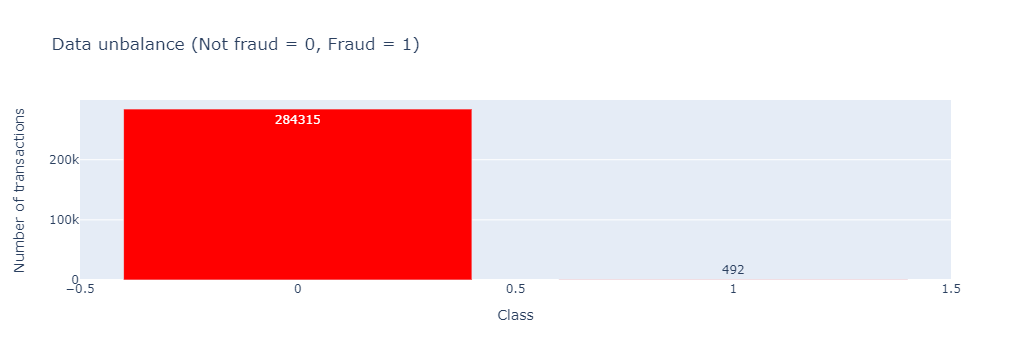

In [9]:
#showing the balance of the dataset in a bar chart
temp = df["Class"].value_counts()
df_1 = pd.DataFrame({'Class': temp.index,'values': temp.values})

trace = go.Bar(
    x = df_1['Class'],y = df_1['values'],
    name="Credit Card Fraud Class - data unbalance (Not fraud = 0, Fraud = 1)",
    marker=dict(color="Red"),
    text=df_1['values']
)
data = [trace]
layout = dict(title = 'Data unbalance (Not fraud = 0, Fraud = 1)',
          xaxis = dict(title = 'Class', showticklabels=True), 
          yaxis = dict(title = 'Number of transactions'),
          hovermode = 'closest',width=600
         )
fig = dict(data=data, layout=layout)
iplot(fig, filename='class')

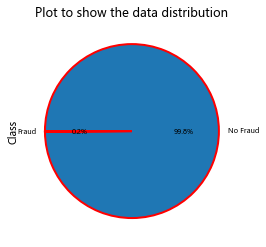

In [10]:
#showing the data distribution in a pie chart
ca1 = df['Class'].value_counts()
ca1 = ca1.set_axis(['No Fraud','Fraud'], axis="index")

plt.rcParams['font.sans-serif'] =['Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False


plt.axes(aspect = 'equal')


ca1.plot(kind = 'pie', 
            autopct='%.1f%%', 
            radius = 1, 
            startangle = 180, 
            counterclock = False, 
            title = 'Plot to show the data distribution', 
            wedgeprops = {'linewidth': 2, 'edgecolor':'red'}, 
            textprops = {'fontsize':7, 'color':'black'} 
        )

plt.show()

In [11]:
#creating a time density plot to show the transactions
class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]

hist_data = [class_0, class_1]
group_labels = ['Not Fraud', 'Fraud']

fig = ff.create_distplot(hist_data, group_labels, show_hist=False, show_rug=False)
fig['layout'].update(title='Credit Card Transactions Time Density Plot', xaxis=dict(title='Time [s]'))
iplot(fig, filename='dist_only')

In [12]:
#normalizing the data
cleaned_df=df.copy()
scaler = StandardScaler() 
cleaned_df['amount_scaled'] = scaler.fit_transform(cleaned_df['Amount'].values.reshape(-1,1))

# Since The `Amount' column covers a huge range. Lets Convert into to a log-space.
cleaned_df['amount_log'] = np.log(cleaned_df.Amount + 0.0001)

In [13]:
#time
df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600))

tmp = df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
df_2 = pd.DataFrame(tmp)
df_2.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
df_2.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


In [14]:
# Use a utility from sklearn to split and shuffle your dataset.
train_df, test_df = train_test_split(cleaned_df, test_size=0.2)
train_df, val_df = train_test_split(train_df, test_size=0.2)

# Form np arrays of labels and features.
train_labels = np.array(train_df.pop('Class'))
bool_train_labels = train_labels != 0
val_labels = np.array(val_df.pop('Class'))
test_labels = np.array(test_df.pop('Class'))

train_features = np.array(train_df)
val_features = np.array(val_df)
test_features = np.array(test_df)

In [15]:
#Normalize the input features using the sklearn StandardScaler. 
#This will set the mean to 0 and standard deviation to 1.
train_features = scaler.fit_transform(train_features)

val_features = scaler.transform(val_features)
test_features = scaler.transform(test_features)

train_features = np.clip(train_features, -5, 5)
val_features = np.clip(val_features, -5, 5)
test_features = np.clip(test_features, -5, 5)


print('Training labels shape:', train_labels.shape)
print('Validation labels shape:', val_labels.shape)
print('Test labels shape:', test_labels.shape)

print('Training features shape:', train_features.shape)
print('Validation features shape:', val_features.shape)
print('Test features shape:', test_features.shape)

Training labels shape: (182276,)
Validation labels shape: (45569,)
Test labels shape: (56962,)
Training features shape: (182276, 32)
Validation features shape: (45569, 32)
Test features shape: (56962, 32)


In [16]:
pd.DataFrame(train_features)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,-1.289592,0.720787,-0.326995,-0.016635,-0.782859,-0.176749,0.266260,-0.549708,0.114161,-0.916968,...,-0.328027,-0.058428,-1.921623,0.696042,-0.693225,0.040239,-0.016353,-0.325549,-0.325549,-0.405689
1,0.805590,1.067834,-1.064744,-0.629338,-1.029260,-1.030302,-0.468768,-0.837504,-0.182465,-0.964153,...,-0.056343,0.188665,-0.719580,-0.497819,-0.334779,0.006391,-0.093835,0.150925,0.150925,0.906774
2,0.436667,0.061604,0.445367,-1.107955,-1.096584,2.243373,2.404647,0.294327,0.767563,-0.146444,...,-1.248623,0.181137,0.978045,-0.814423,0.339828,0.605501,0.211721,-0.346989,-0.346989,-0.925005
3,0.588083,0.965431,0.184001,-0.098149,2.863688,-0.053594,0.117886,-0.161478,0.032567,-0.164626,...,0.688841,0.142376,0.069381,0.167669,0.276415,-0.012588,-0.140658,-0.357831,-0.357831,-5.000000
4,-0.449987,0.652836,0.326363,-0.067972,0.776535,0.052864,-0.887799,0.465869,-0.315838,-0.311933,...,0.139860,-0.242320,0.690066,1.660242,-0.618627,-0.011727,0.036302,-0.354217,-0.354217,-1.447876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182271,-0.174867,-0.376512,0.194819,1.015272,-0.839691,-0.187629,-0.263978,1.025938,-0.218820,0.570964,...,1.345843,-0.091357,-0.010420,0.461202,-1.131388,0.471193,-0.040329,0.250938,0.250938,0.992197
182272,0.627978,1.035478,0.333918,-1.632304,0.411295,0.547840,-0.973742,0.227063,-0.213691,0.214175,...,0.767527,-0.165459,-0.896593,0.531621,-0.210403,0.043505,-0.013512,-0.353770,-0.353770,-1.392415
182273,-0.840521,-0.144672,0.363975,1.149356,-0.535740,-0.026417,-0.280184,0.488091,-0.194447,-0.015724,...,-0.046971,-0.098805,0.234779,-0.802762,1.764936,-0.786956,-0.635065,-0.296921,-0.296921,-0.103508
182274,1.037196,-0.026744,0.270325,0.937746,-0.378920,-0.345533,-0.186605,0.077320,0.043017,0.822014,...,0.770093,-0.011425,-0.198948,-1.200907,-1.018621,0.018274,0.179186,-0.255787,-0.255787,0.142097


In [17]:
#defining the model
RF = RandomForestClassifier()

In [18]:
RF = RandomForestClassifier(n_estimators=50,  # number of trees in the forest
                             criterion='entropy',  # quality of a split, can also be 'entropy'
                             max_depth=None,  # maximum depth of the tree, None means no limit
                             min_samples_split=2,  # minimum number of samples required to split a node
                             min_samples_leaf=1,  # minimum number of samples required at a leaf node
                             max_features='auto',  # number of features to consider for best split, can be int, float, 'auto', 'sqrt', 'log2' or None
                             bootstrap=True,  # whether bootstrap samples are used when building trees
                             oob_score=False,  # whether to use out-of-bag samples for a generalization error estimate
                             random_state=None,  # seed for random number generator
                             verbose=0,  # control the verbosity of the output
                             class_weight=None)  # weights associated with classes, can be 'balanced', 'balanced_subsample' or a dict

In [19]:
#oversampling on training data
print('Original dataset shape %s' % Counter(train_labels))

ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(train_df,train_labels)

print('Resampled dataset shape %s' % Counter(y_train_ros))

Original dataset shape Counter({0: 181961, 1: 315})
Resampled dataset shape Counter({0: 181961, 1: 181961})


In [20]:
#oversampling on testing data
print('Original dataset shape %s' % Counter(test_labels))

ros = RandomOverSampler(random_state=42)
X_test_ros, y_test_ros = ros.fit_resample(test_df,test_labels)

print('Resampled dataset shape %s' % Counter(y_test_ros))

Original dataset shape Counter({0: 56862, 1: 100})
Resampled dataset shape Counter({0: 56862, 1: 56862})


In [21]:
k_fold= KFold(n_splits=5, shuffle=True, random_state=None)

In [22]:
cv_scores = cross_val_score(RF,X_train_ros,y_train_ros , cv=k_fold, scoring='accuracy')

In [23]:
np.mean(cv_scores)

0.9999587823386884

In [24]:
cv_scores

array([0.99994504, 0.99998626, 0.9999313 , 0.99998626, 0.99994504])

In [25]:
std_score = np.std(cv_scores)

In [26]:
std_score

2.29901732376293e-05